In [1]:
!git clone https://github.com/microsoft/GUI-Actor.git
%cd GUI-Actor



Cloning into 'GUI-Actor'...
remote: Enumerating objects: 387, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 387 (delta 55), reused 55 (delta 30), pack-reused 283 (from 1)
Receiving objects: 100% (387/387), 7.54 MiB | 32.05 MiB/s, done.
Resolving deltas: 100% (181/181), done.
/kaggle/working/GUI-Actor


In [2]:
!pip install -e .
!pip install git+https://github.com/openai/whisper.git
!pip install qwen-vl-utils


Obtaining file:///kaggle/working/GUI-Actor
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.7 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.6 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━

In [3]:
import sys
sys.path.append('/kaggle/working/GUI-Actor/src')


In [4]:
audio_file = "/kaggle/input/input/Record (online-voice-recorder.com).mp3"
image_file = "/kaggle/input/input/Screenshot 2025-07-01 124525.png"



In [5]:
import whisper

whisper_model = whisper.load_model("base")
result = whisper_model.transcribe(audio_file)
instruction = result["text"]

print(f"🗣️ Instruction: {instruction}")


100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 145MiB/s]


🗣️ Instruction:  click on the windows update


In [6]:
import torch
from PIL import Image
from transformers import Qwen2VLProcessor
from gui_actor.modeling import Qwen2VLForConditionalGenerationWithPointer
from gui_actor.inference import inference

model_name = "microsoft/GUI-Actor-2B-Qwen2-VL"

processor = Qwen2VLProcessor.from_pretrained(model_name)
tokenizer = processor.tokenizer

model = Qwen2VLForConditionalGenerationWithPointer.from_pretrained(
    model_name,
    torch_dtype=torch.float32, 
    device_map="auto"
).eval()

image = Image.open(image_file).convert("RGB")
print("Original size:", image.size)

# Resize to smaller resolution
image = image.resize((480, 270))  # Example: 480p
print("Resized to:", image.size)

conversation = [
    {
        "role": "system",
        "content": [
            {
                "type": "text",
                "text": (
                    "You are a GUI agent. You are given a task and a screenshot of the screen. "
                    "You need to perform a series of pyautogui actions to complete the task."
                )
            }
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": instruction.strip()}
        ]
    }
]


pred = inference(conversation, model, tokenizer, processor, use_placeholder=True, topk=1)
px, py = pred["topk_points"][0]
print(f"🎯 Predicted click: [{px:.4f}, {py:.4f}]")


2025-07-04 09:49:58.811170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751622598.977777      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751622599.020035      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[2025-07-04 09:50:09,510] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


preprocessor_config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/965 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.45G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

Original size: (1920, 1200)
Resized to: (480, 270)
🎯 Predicted click: [0.8529, 0.1500]


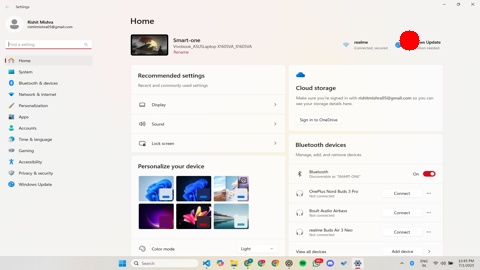

In [7]:
import cv2
import numpy as np
from IPython.display import display, Image as IPyImage

# Original image size (after resizing)
w, h = image.size

# Predicted normalized coordinates
x = int(px * w)
y = int(py * h)

# Convert PIL image to OpenCV format
img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Draw circle at predicted point
cv2.circle(img_cv, (x, y), 10, (0, 0, 255), -1)  # Red dot

# Save and display
cv2.imwrite("click_visualization.jpg", img_cv)
display(IPyImage("click_visualization.jpg"))
